**BASIC MNIST EXAMPLE WITH MLP**

Install Keras just in case...

In [ ]:
!pip3 install keras

Imports...

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Define batch size, number of epochs and number of classes


In [3]:
batch_size = 128
epochs = 25
num_classes=10

Load MNIST and transform

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

training set (60000, 28, 28)
test set (10000, 28, 28)


Define the NN topology, a sequential model with 2 hidden layers

In [5]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Define an optimizer 

In [6]:
sgd=SGD(lr=0.01, decay=1e-6, momentum=0.9)

Compile the model, define loss and link the optimizer

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Finally, train the model and evaluate over the test data

In [8]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Evaluate over test
score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 0.4385 - accuracy: 0.8785 - val_loss: 0.2285 - val_accuracy: 0.9344
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: 0.1979 - accuracy: 0.9436 - val_loss: 0.1650 - val_accuracy: 0.9519
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 0.1437 - accuracy: 0.9594 - val_loss: 0.1327 - val_accuracy: 0.9611
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 0.1128 - accuracy: 0.9675 - val_loss: 0.1073 - val_accuracy: 0.9679
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 0.0922 - accuracy: 0.9739 - val_loss: 0.0943 - val_accuracy: 0.9720
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: 0.0770 - accuracy: 0.9778 - val_loss: 0.0884 - val_accuracy: 0.9722
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: 0.0651 - accuracy: 0.9817 - val_loss: 0.0905 - val_accuracy: 0.9705
Epoch 

In [9]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [10]:
import matplotlib.pyplot as plt



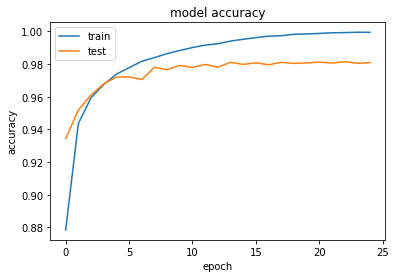

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()